In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BNB.csv',sep=";")
df1=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 9s 253ms/step - loss: 0.0103 - val_loss: 0.0050
Epoch 2/100
16/16 [==============================] - 2s 148ms/step - loss: 0.0019 - val_loss: 0.0250
Epoch 3/100
16/16 [==============================] - 2s 151ms/step - loss: 0.0014 - val_loss: 0.0139
Epoch 4/100
16/16 [==============================] - 2s 150ms/step - loss: 0.0011 - val_loss: 0.0448
Epoch 5/100
16/16 [==============================] - 2s 146ms/step - loss: 0.0010 - val_loss: 0.0155
Epoch 6/100
16/16 [==============================] - 2s 150ms/step - loss: 9.6697e-04 - val_loss: 0.0076
Epoch 7/100
16/16 [==============================] - 2s 151ms/step - loss: 9.3697e-04 - val_loss: 0.0103
Epoch 8/100
16/16 [==============================] - 2s 145ms/step - loss: 9.0824e-04 - val_loss: 0.0064
Epoch 9/100
16/16 [==============================] - 2s 143ms/step - loss: 9.4455e-04 - val_loss: 0.0062
Epoch 10/100
16/16 [==============================] - 2s 150ms/step - loss:

16/16 [==============================] - 2s 156ms/step - loss: 2.8353e-04 - val_loss: 0.0131
Epoch 79/100
16/16 [==============================] - 2s 148ms/step - loss: 3.0523e-04 - val_loss: 0.0073
Epoch 80/100
16/16 [==============================] - 2s 153ms/step - loss: 3.5940e-04 - val_loss: 0.0095
Epoch 81/100
16/16 [==============================] - 2s 140ms/step - loss: 3.2344e-04 - val_loss: 0.0055
Epoch 82/100
16/16 [==============================] - 2s 144ms/step - loss: 3.4634e-04 - val_loss: 0.0053
Epoch 83/100
16/16 [==============================] - 2s 155ms/step - loss: 3.3711e-04 - val_loss: 0.0107
Epoch 84/100
16/16 [==============================] - 2s 146ms/step - loss: 2.6868e-04 - val_loss: 0.0105
Epoch 85/100
16/16 [==============================] - 2s 140ms/step - loss: 2.4991e-04 - val_loss: 0.0129
Epoch 86/100
16/16 [==============================] - 2s 141ms/step - loss: 2.5381e-04 - val_loss: 0.0077
Epoch 87/100
16/16 [==============================] - 2s 14

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 36ms/step


In [11]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval)) * 100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 0.08388058413350323
Testing RMSE: 0.226435744784297
Validation MAPE: 16.86927862123746
Testing MAPE: 37.2249058404756
Validation MAE: 0.0767949468613991
Testing MAE: 0.1847156420470749


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

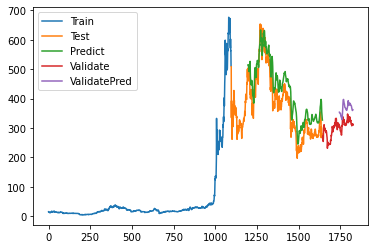

In [13]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()